# Exercise: Transfer learning using MobileNetV3

In the field of machine learning, transfer learning has emerged as a powerful technique to leverage pre-trained models and apply them to new tasks. This approach allows us to save time and computational resources by reusing the knowledge gained from training on large datasets. In this exercise we use MobileNetV3, a previously state-of-the-art convolutional neural network architecture, to train a classifier for the MNIST dataset using the PyTorch framework.

## Steps

1. Load the MNIST dataset using the torchvision package.
2. Define a PyTorch model using the MobileNetV3 architecture.
3. Train the model on the MNIST dataset.
4. Evaluate the model on the test set.

## Step 1: Load the MNIST dataset using the torchvision package.

The torchvision package provides access to popular datasets, model architectures, and image transformations for computer vision. We can use the torchvision.datasets.MNIST class to load the MNIST dataset. The dataset is downloaded and cached automatically.


In [7]:
# Load the MNIST dataset using the torchvision package

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Load the training and test datasets using torchvision
# Convert to RGB from grayscale by passing in the transform argument and then use the transforms.ToTensor() function

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), lambda x: x.repeat(3, 1, 1)]))
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), lambda x: x.repeat(3, 1, 1)]))

# Create a data loader from the training and test datasets
# We will convert the images to PyTorch tensors and normalize them
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=0)

# Print the size of the training and test datasets
print('Size of the training dataset:', len(trainset))
print('Size of the test dataset:', len(testset))

# Print the size of the training and test dataloaders
print('Size of the training dataloader:', len(trainloader))
print('Size of the test dataloader:', len(testloader))

# Print the shape of the first element of the training dataset
print('Label of the first element of the training dataset:', trainset[0][1])



Size of the training dataset: 60000
Size of the test dataset: 10000
Size of the training dataloader: 1875
Size of the test dataloader: 313
Label of the first element of the training dataset: 5


## Step 2. Define a PyTorch model using the MobileNetV3 architecture.

The torchvision.models.mobilenet_v3_large class provides a pre-trained MobileNetV3 model. We can use the model as a feature extractor by replacing the last fully-connected layer with a new one that has the correct number of output features for the MNIST dataset. We can then freeze the weights of the convolutional layers and train only the new fully-connected layer.

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

mobilenet_v3_model = models.mobilenet_v3_small(pretrained=True)
print(mobilenet_v3_model)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [9]:
print(mobilenet_v3_model.classifier[3])

Linear(in_features=1024, out_features=1000, bias=True)


In [10]:

# Define a model class that extends the nn.Module class
class MobileNetV3(nn.Module):
    def __init__(self):
        super(MobileNetV3, self).__init__()
        # Define the MobileNetV3 architecture
        self.model = models.mobilenet_v3_small(pretrained=True)
        # Replace the last fully-connected layer with a new one
        self.model.classifier[3] = nn.Linear(1024, 10)
    def forward(self, x):
        # Resize the input if needed
        if x.shape[-2:] != (224, 224):
            x = F.interpolate(x, size=(224, 224), mode='bilinear', align_corners=False)
        x = self.model(x)
        return x

    def freeze(self):
        # Freeze all the weights of the network except for the last fully-connected layer
        for param in self.model.parameters():
            param.requires_grad = False
        for param in self.model.classifier[3].parameters():
            param.requires_grad = True
    def unfreeze(self):
        # Unfreeze all the weights of the network
        for param in self.model.parameters():
            param.requires_grad = True

# Create an instance of the MobileNetV3 model
model = MobileNetV3()
print(model)

MobileNetV3(
  (model): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (activation): ReLU()
            (scale_activation): Hardsigmoid()
          )
          (2): Conv2d

## Step 3. Train the model on the MNIST dataset

We can train the model using the standard PyTorch training loop. We use the Adam optimizer with a learning rate of 0.001 and a batch size of 64. We train the model for 10 epochs.

In [11]:
# Set the device as GPU, MPS, or CPU according to availability
device = torch.device(
    "cuda:0" if torch.cuda.is_available() else (
        "mps" if torch.backends.mps.is_available()
        else "cpu"
    )
)

# device = torch.device("cpu")
print(device)

cuda:0


In [12]:
# Create a PyTorch training loop

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

model.freeze() # Freeze all the weights except for the last fully-connected layer

model = model.to(device) # Move the model weights to the device

for epoch in range(5):
    for batch_num, (images, labels) in enumerate(trainloader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()

        # Print the loss for every 100th iteration
        if (batch_num) % 500 == 0:
            print('Epoch [{}/{}], Batch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, 10, batch_num+1, len(trainloader), loss.item()))
                
    # Print the loss and accuracy on the test set
    correct = 0
    total = 0
    loss = 0

    with torch.no_grad():
        for images, labels in testloader:
            # Move tensors to the configured device
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss += criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)

            # Compute the accuracy
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print('Test Loss of the model on the test images: {} %'.format(loss / total))

Epoch [1/10], Batch [1/1875], Loss: 2.3333


Epoch [1/10], Batch [501/1875], Loss: 0.1323
Epoch [1/10], Batch [1001/1875], Loss: 0.0546
Epoch [1/10], Batch [1501/1875], Loss: 0.3574
Test Accuracy of the model on the test images: 95.24 %
Test Loss of the model on the test images: 0.005004147533327341 %
Epoch [2/10], Batch [1/1875], Loss: 0.2238
Epoch [2/10], Batch [501/1875], Loss: 0.1285
Epoch [2/10], Batch [1001/1875], Loss: 0.0166
Epoch [2/10], Batch [1501/1875], Loss: 0.0757
Test Accuracy of the model on the test images: 95.38 %
Test Loss of the model on the test images: 0.004720696248114109 %
Epoch [3/10], Batch [1/1875], Loss: 0.0576
Epoch [3/10], Batch [501/1875], Loss: 0.1996
Epoch [3/10], Batch [1001/1875], Loss: 0.3351
Epoch [3/10], Batch [1501/1875], Loss: 0.2776
Test Accuracy of the model on the test images: 95.25 %
Test Loss of the model on the test images: 0.005160179454833269 %
Epoch [4/10], Batch [1/1875], Loss: 0.1365
Epoch [4/10], Batch [501/1875], Loss: 0.1407
Epoch [4/10], Batch [1001/1875], Loss: 0.0576
Epoch

## Step 4. Evaluate the model on the test set

We evaluate the model on the test set by:
* printing the accuracy,
* plotting a confusion matrix to visualize the performance of the classifier, and
* plotting a few examples of correct and incorrect predictions.


In [13]:
# Print the accuracy on the test set

correct = 0
total = 0
loss = 0

with torch.no_grad():
    for images, labels in testloader:
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss += criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)

        # Compute the accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy of the model on the test images: {} %'.format(100 * correct / total))
print('Test Loss of the model on the test images: {:0.3f}'.format(loss / total))

Test Accuracy of the model on the test images: 95.09 %
Test Loss of the model on the test images: 0.006


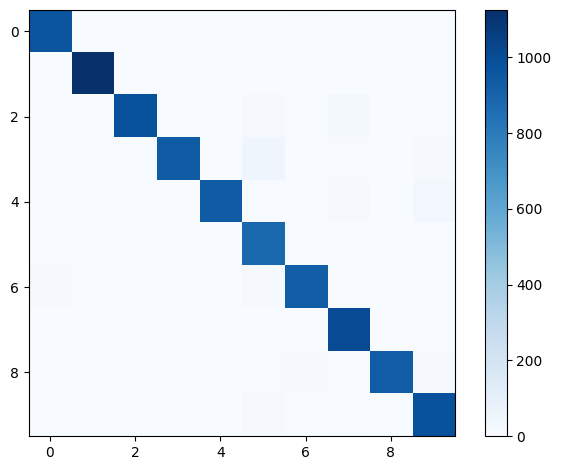

In [14]:
# Plot a confusion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Set the model to evaluation mode
model.eval()

# Get predictions for the test data and convert them to a NumPy array
y_pred = []
y_true = []

with torch.no_grad():
    for images, labels in testloader:
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Append batch prediction results
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.tight_layout()
plt.show()


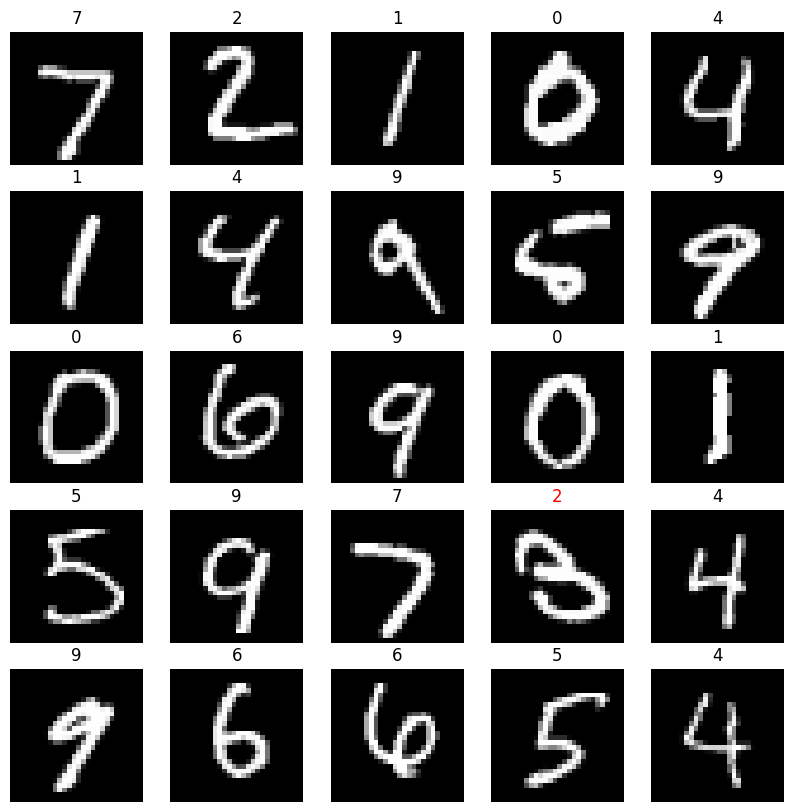

In [15]:
# Plotting a few examples of correct and incorrect predictions

import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
model.eval()

# Get predictions for the test data and convert them to a NumPy array
y_pred = []
y_true = []
images = []

with torch.no_grad():
    for image, label in testloader:
        # Move tensors to the configured device
        image = image.to(device)
        label = label.to(device)

        # Forward pass
        output = model(image)
        _, predicted = torch.max(output.data, 1)

        # Append batch prediction results
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(label.cpu().numpy())
        images.extend(image.cpu().numpy())

# Plot a few examples of correct and incorrect predictions
fig = plt.figure(figsize=(10, 10))

for i, (image, y_t, y_p) in enumerate(zip(images, y_true, y_pred)):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    image = np.transpose(image, (1, 2, 0))  # Convert the image from 3x28x28 to 28x28x3
    plt.imshow(np.squeeze(image))
    if y_t == y_p:
        plt.title(y_p)
    else:
        plt.title(y_p, color='red')
        
    if i == 24:
        plt.show()
        break
